In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#Load dataset
df = pd.read_csv("/content/train.csv.zip", parse_dates=['date'])


**Prepare Data**

In [5]:
daily_sales = df.groupby('date')['sales'].sum().reset_index()
daily_sales.head()

,date,sales
0,2013-01-01,2511.618999
1,2013-01-02,496092.417944
2,2013-01-03,361461.231124
3,2013-01-04,354459.677093
4,2013-01-05,477350.121229


**Compute Moving Averages**

In [6]:
daily_sales['MA_7'] = daily_sales['sales'].rolling(window=7).mean()
daily_sales['MA_30'] = daily_sales['sales'].rolling(window=30).mean()


**Compare Forecast vs Actual**

In [7]:
daily_sales.tail(10)


,date,sales,MA_7,MA_30
1674,2017-08-06,1.049559e+06,915741.943736,864134.552387
1675,2017-08-07,7.974650e+05,903114.532729,857438.478080
1676,2017-08-08,7.177663e+05,864434.330715,844669.578971
1677,2017-08-09,7.341397e+05,831495.424709,842335.606070
1678,2017-08-10,6.513869e+05,820540.914257,839697.344213
1679,2017-08-11,8.263737e+05,820340.633670,842283.135083
1680,2017-08-12,7.926305e+05,795617.331469,847715.774155
1681,2017-08-13,8.656397e+05,769343.119068,851054.109491
1682,2017-08-14,7.609224e+05,764122.753677,844115.618857
1683,2017-08-15,7.626619e+05,770536.408939,832844.226755


**Plot Trend Lines**

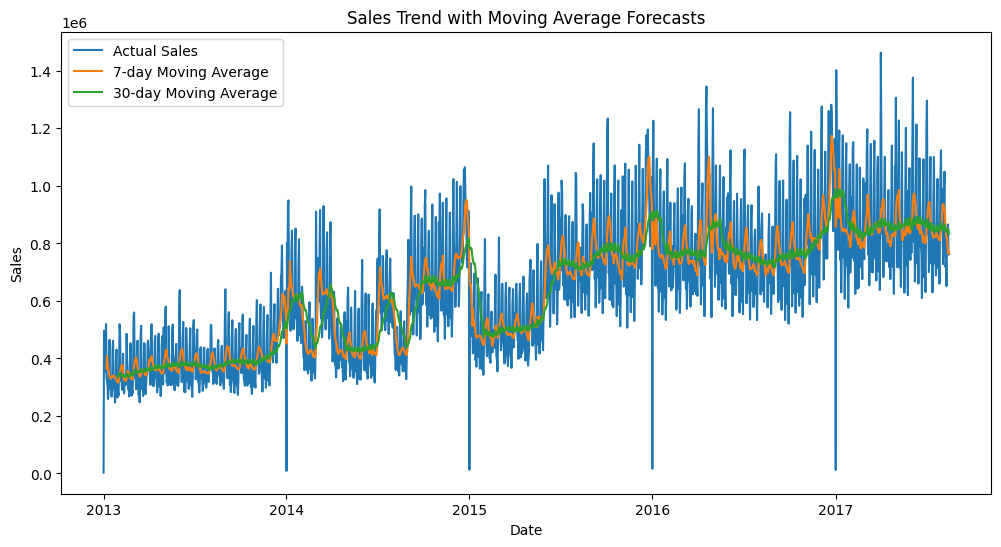

In [8]:
plt.figure(figsize=(12,6))
plt.plot(daily_sales['date'], daily_sales['sales'], label="Actual Sales")
plt.plot(daily_sales['date'], daily_sales['MA_7'], label="7-day Moving Average")
plt.plot(daily_sales['date'], daily_sales['MA_30'], label="30-day Moving Average")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Sales Trend with Moving Average Forecasts")
plt.show()